In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [4]:
url_dessert = "https://www.food.com/ideas/top-dessert-recipes-6930?ref=nav#c-791391"

In [5]:
r = requests.get(url_dessert)
print(r.status_code)

200


In [6]:
soup = BeautifulSoup(r.text)

In [7]:
items = soup.find_all("div", {"class":"smart-card container-sm recipe"})

In [30]:
name = []
article = []
comment = []
comment_name = []
rank = []
counter = 1

for item in items:
    namee = item.find("div", {"class": "smart-info-wrap"}).find("a").text
    name.append(namee)

    articlee = item.find("div", {"class":"smart-info-wrap"}).find("label").text
    article.append(articlee)

    descriptionn = (
    item.find("p", {"class": "description"}).text
    .replace("“", "")
    .replace("”", "")
    .replace("'", "")
    .replace('"', "")
    .replace("‘", "")
    .replace("’", "")
    .strip()
)
    comment.append(descriptionn)

    person = item.find("p", {"class": "attribution"})
    if person:
        comment_name.append(person.text.strip("-").strip())
    else:
        comment_name.append("No name")

    rank.append(counter)
    counter += 1

In [ ]:
comment

In [32]:
df_dessert = pd.DataFrame({"Recipe_Name" : name, 'Rank': rank, "Comment" : comment, "Comment_Name" : comment_name, "Article" : article})
df_dessert

,Recipe_Name,Rank,Comment,Comment_Name,Article
0,The Ultimate Chocolate Cake,1,"Wow, not too sweet and really moist. The frost...",Poppy,recipe
1,Bananas Foster,2,A fantastic recipe for Bananas Foster that had...,BecR2400,recipe
2,The Best Snickerdoodles,3,"This recipe made large cookies, and everyone w...",Cheesehead,recipe
3,Cream Cheese Brownies,4,This recipe was a complete surprise. The combi...,Taj Mahal,recipe
4,Strawberry Pie,5,Id never had a strawberry pie made with jello ...,Chef shapeweaver,recipe
...,...,...,...,...,...
96,Creme Brulee,97,This is an awesome creme brulee. Im asked for ...,lazyme,recipe
97,Raspberry Walnut Torte,98,It is a lot easier to make than it might appea...,JeriBinNC,recipe
98,Chocolate Chip Panookies,99,"Ive always had this dessert in restaurants, bu...",Liza at Food.com,recipe
99,The Best Brownies,100,These are literally the best brownies. Ive bee...,lilchef_3,recipe


In [50]:
url_cookies = "https://www.food.com/ideas/cookie-recipes-7152?ref=nav#c-932718"

In [51]:
r_cookies = requests.get(url_cookies)
print(r_cookies.status_code)

200


In [52]:
soup_cookies = BeautifulSoup(r_cookies.text)

In [53]:
items_cookies = soup_cookies.find_all("div", {"class":"smart-card container-sm recipe"})

In [54]:
name = []
article = []
comment = []
comment_name = []
rank = []
counter = 1

for item in items_cookies:
    namee = item.find("div", {"class": "smart-info-wrap"}).find("a").text
    name.append(namee)

    articlee = item.find("div", {"class":"smart-info-wrap"}).find("label").text
    article.append(articlee)

    descriptionn = (
    item.find("p", {"class": "description"}).text
    .replace("“", "")
    .replace("”", "")
    .replace("'", "")
    .replace('"', "")
    .replace("‘", "")
    .replace("’", "")
    .strip()
)
    comment.append(descriptionn)

    person = item.find("p", {"class": "attribution"})
    if person:
        comment_name.append(person.text.strip("-").strip())
    else:
        comment_name.append("No name")

    rank.append(counter)
    counter += 1

In [2]:
df_cookies = pd.DataFrame({"Recipe_Name" : name, 'Rank': rank, "Comment" : comment, "Comment_Name" : comment_name, "Article" : article})
df_cookies

NameError: name 'name' is not defined

In [56]:
combined_df = pd.concat([df_dessert, df_cookies], ignore_index=True)

In [57]:
combined_df.to_csv('dessert_cookies.csv', index=False)

In [3]:
data = pd.read_csv("dessert_cookies.csv")
data.head()

,Recipe_Name,Rank,Comment,Comment_Name,Article
0,The Ultimate Chocolate Cake,1,"Wow, not too sweet and really moist. The frost...",Poppy,recipe
1,Bananas Foster,2,A fantastic recipe for Bananas Foster that had...,BecR2400,recipe
2,The Best Snickerdoodles,3,"This recipe made large cookies, and everyone w...",Cheesehead,recipe
3,Cream Cheese Brownies,4,This recipe was a complete surprise. The combi...,Taj Mahal,recipe
4,Strawberry Pie,5,Id never had a strawberry pie made with jello ...,Chef shapeweaver,recipe


41
                                           Recipe_Name  Rank  \
0                          The Ultimate Chocolate Cake     1   
5      Extra-Chocolate Bundt Cake With Chocolate Glaze     6   
13                   Silky Chocolate Peanut Butter Pie    14   
25                         Chocolate Molten Lava Cakes    26   
26                              German Chocolate Icing    27   
28                Peanut Butter Chocolate Chip Muffins    29   
37                 Double-chocolate Praline-fudge Cake    38   
39                          Chocolate Chip Cookie Bars    40   
53                  Chocolate-Peanut Butter Cookie Pie    54   
60                                Chocolate Cookarolis    61   
76                    Dark Chocolate Red Wine Truffles    77   
77                    Peanut Butter Chocolate Cupcakes    78   
81                               Easy Chocolate Mousse    82   
95                               Chocolate Eclair Cake    96   
98                            Chocola

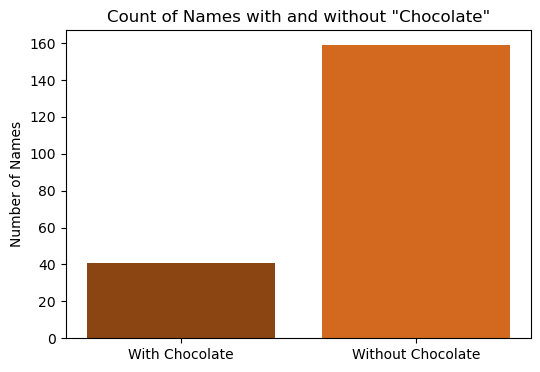

In [9]:
import matplotlib.pyplot as plt
chocolate_names = data[data['Recipe_Name'].str.contains('Chocolate', case=False, na=False)]

# Count the number of names with "chocolate"
count = len(chocolate_names)
print(count)
print(chocolate_names)

# Create a visualization
labels = ['With Chocolate', 'Without Chocolate']
values = [count, len(data) - count]

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['#8B4513', '#D2691E'])
plt.title('Count of Names with and without "Chocolate"')
plt.ylabel('Number of Names')
plt.show()

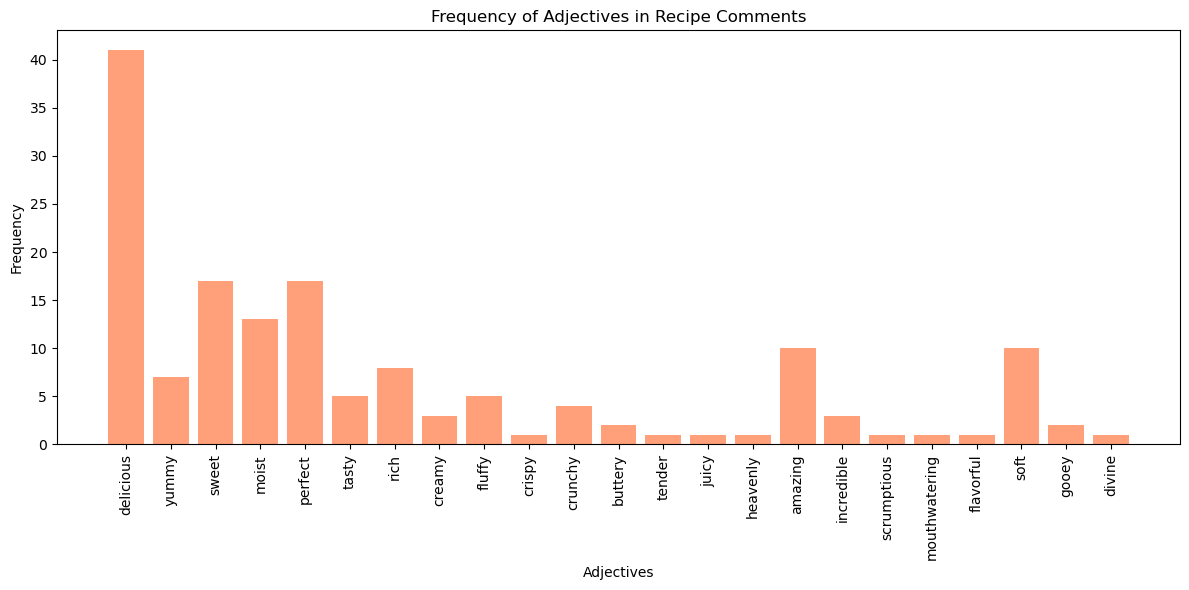

In [13]:
from collections import Counter

adjectives = [
    'delicious', 'yummy', 'sweet', 'moist', 'perfect', 'tasty', 
    'rich', 'creamy', 'fluffy', 'crispy', 'crunchy', 'buttery', 
    'tender', 'juicy', 'heavenly', 'amazing', 'incredible', 'scrumptious', 
    'mouthwatering', 'flavorful', 'soft', 'gooey', 'divine'
]

# Function to count adjectives in comments
def count_adjectives(comments):
    word_count = Counter()
    for comment in comments:
        words = re.findall(r'\b\w+\b', comment.lower())
        for adjective in adjectives:
            word_count[adjective] += words.count(adjective)
    return word_count

# Count adjectives in the comments
adjective_counts = count_adjectives(data['Comment'])

plt.figure(figsize=(12, 6))
plt.bar(adjective_counts.keys(), adjective_counts.values(), color='#FFA07A')
plt.xticks(rotation=90)  # Rotate the labels to be vertical
plt.xlabel('Adjectives')
plt.ylabel('Frequency')
plt.title('Frequency of Adjectives in Recipe Comments')
plt.tight_layout()
plt.show()



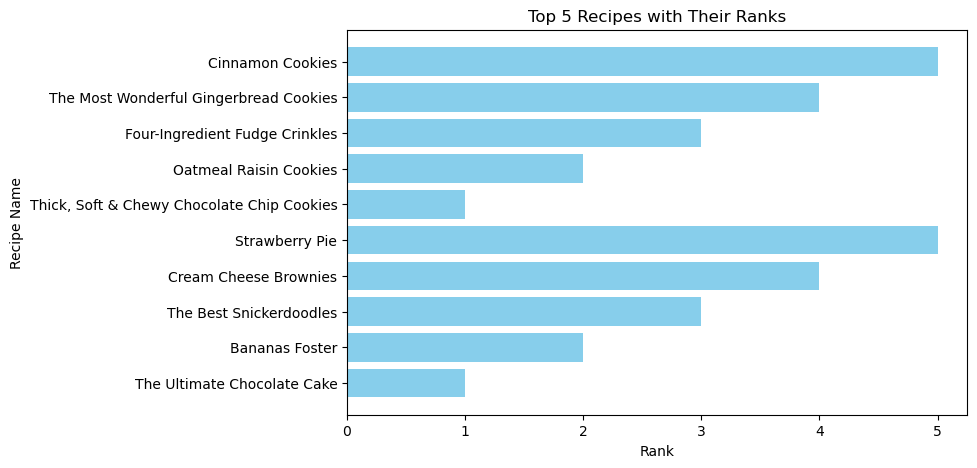

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandas.plotting import parallel_coordinates

top_five = data[data['Rank'] <= 5]

plt.figure(figsize=(8, 5))
plt.barh(top_five['Recipe_Name'], top_five['Rank'], color='skyblue')

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Recipe Name')
plt.title('Top 5 Recipes with Their Ranks')

# Show the plot
plt.show()


